<h3> Machine Learning Project 6 </h3>
    <p> Liora Wachsstock </p>
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#constants
UPPER = 10
LOWER = -2

In [3]:
def generate_data(n):
    rng = np.random.default_rng()
    x = (UPPER - LOWER) * rng.random(n) + LOWER
    y = f(x)
    data = np.stack((x, y), axis=-1)
    
    return pd.DataFrame(data, columns=("X", "Y"))

def f(x):
    return np.square(x) + 10

#generate data
train = generate_data(12)
test = generate_data(5)

#check for intersecting values and re-sample if necessary
while (np.intersect1d(train.T[0], test.T[0]).size > 0): #only have to check if there are identical values in x values
    print(np.intersect1d(train.T[0], test.T[0]))
    test = generate_data(5)

print(train)
print(test)

           X           Y
0   2.187392   14.784684
1  -0.257473   10.066292
2   6.063485   46.765849
3   9.787231  105.789885
4   3.640161   23.250772
5  -1.110064   11.232241
6   6.872524   57.231589
7   2.919037   18.520777
8  -0.309339   10.095691
9  -1.303998   11.700410
10  9.063292   92.143264
11  8.567079   83.394840
          X          Y
0  1.704866  12.906567
1  4.874643  33.762140
2 -0.641536  10.411568
3  6.952591  58.338515
4  1.096001  11.201219


In [4]:
def quadratic_regression(data):
    #math from https://www.varsitytutors.com/hotmath/hotmath_help/topics/quadratic-regression
    
    powers = np.array([4,3,2,3,2,1,2,1,0])
    
    #repeat each of the x values 9 times for the powers
    x_s = np.repeat(np.array(data['X']), [powers.size]).reshape(data['X'].size, powers.size) 
    
    coeff_m = np.sum(np.power(x_s, powers), axis=0).reshape(3,3)
    
    y_col = np.vstack((np.sum(np.square(data['X'])*data['Y']), np.sum(data['X']*data['Y']), np.sum(data['Y'])))
    
    result = np.matmul(np.linalg.inv(coeff_m), y_col)
    print(result)
    return result

def g(abc, x): # create the actual hypothesis line
    a,b,c = abc
    y = a*np.square(x) + b*x + c # equation of the curve
    return y

def curve(abc):
    x = np.arange(-25, 25 ) # points on the curve
    y = g(abc, x) # equation of the estimated y
    return x,y

def error(data, weights):
    yhat = g(weights, data['X'])
    return np.sum(np.square(data['Y'] - yhat)) #SSE

def e_reg(lam, data, weights):
    return error(data, weights) + lam*np.sum(np.square(weights))
'''
cross validation: 
take out a validation set from the training set, and find the best line from all the hypothesis that makes the smallest
error in the validation set and use its model family
then take the validation set and re run the learning with the best model. s
'''

'\ncross validation: \ntake out a validation set from the training set, and find the best line from all the hypothesis that makes the smallest\nerror in the validation set and use its model family\nthen take the validation set and re run the learning with the best model. s\n'

In [5]:
def ridge_reg(lam, x_series, y):
    
    #add a dummy x0 = 1
    x = np.array(x_series).reshape(x_series.size,1)
    x = np.insert(x, 0,1,axis=1)

    return np.dot(np.linalg.inv(np.dot(x.T, x) + lam*np.identity(x.shape[1])), np.dot(x.T, y))
    

def get_validation_data(data, group_num, k):
    num_in_group = int(np.floor(data.shape[0] / k))
    v_data = data[group_num*num_in_group: group_num*num_in_group + num_in_group]
    
    tr_data = np.vstack((data[:group_num*num_in_group], data[group_num*num_in_group + num_in_group :]))
    return v_data, pd.DataFrame(tr_data, columns=("X", "Y"))

[[ 1.00000000e+00]
 [-3.19744231e-14]
 [ 1.00000000e+01]]
(913.6373667717776, array([0.        , 8.88025892, 8.72304488]))
Training Error for Quadratic regression:  2.6855980657344126e-26
Training Error for ridge regression:  913.6373667717776


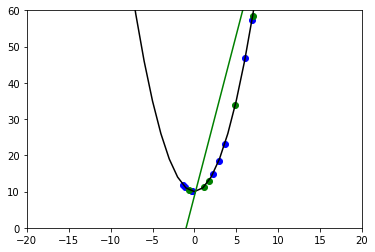

In [6]:
fig, ax = plt.subplots()
plt.xlim([-20,20])
plt.ylim([0,60])

k = 3

# plot the points
ax.scatter(train['X'], train['Y'], c='b')
ax.scatter(test['X'], test['Y'], c='g')

# quadratic regression
result = quadratic_regression(train).flatten()
x, y = curve(result)

lams = [0.1, 1, 10, 100]

models = []

for lam in lams:
    error_history = []
    for i in range(k - 1): #k groups, so k - 1 divisions of the data needed
        validation_set, train_set = get_validation_data(train, i, k)
        rdge = ridge_reg(lam, train_set['X'], train_set['Y'])
        
        lin_reg_result = np.insert(rdge, 0, 0) # add in a zero a term so it's a straight line when we plot it
        error_history.append(e_reg(lam, validation_set, lin_reg_result))
    
    #for this model, get Rcv
    R_cv = np.mean(error_history)
    
    #re-train on the whole data set
    rdge = ridge_reg(lam, train_set['X'], train_set['Y'])  
    lin_reg_result = np.insert(rdge, 0, 0) # add in a zero a term so it's a straight line

    models.append((R_cv, lin_reg_result)) #keep track of R and g(x) for each set
    
model = min(models, key = lambda t: t[0]) # get the one with the smallest R
print(model)
final_result = model[1] #line


# plot the lines/curves
ax.plot(x, y, 'k',label="f(x) = x^2 + 10")
xlin, ylin = curve(final_result)
ax.plot(xlin, ylin, 'g')

#for line in lines:
  #  xlin, ylin = curve(line)
  #  ax.plot(xlin, ylin, 'g')



print("Training Error for Quadratic regression: ", error(train, result))
print("Training Error for ridge regression: ", model[0])
plt.show()

In [8]:
print("a) Training Set values: ")
print(train)
print("   Test Set values: ")
print(test)

print("\nb) Equation of non-linear regression relation: y =", result[0],"x^2 + ",result[1], "x +", result[0])
print("   In-sample error: ", error(train, result))
print("   Test error: ", error(test, result))

print("\nc) ")
for i, lam in enumerate(lams):
    print("lambda", lam, ": CV error was", models[i][0])
    

a) Training Set values: 
           X           Y
0   2.187392   14.784684
1  -0.257473   10.066292
2   6.063485   46.765849
3   9.787231  105.789885
4   3.640161   23.250772
5  -1.110064   11.232241
6   6.872524   57.231589
7   2.919037   18.520777
8  -0.309339   10.095691
9  -1.303998   11.700410
10  9.063292   92.143264
11  8.567079   83.394840
   Test Set values: 
          X          Y
0  1.704866  12.906567
1  4.874643  33.762140
2 -0.641536  10.411568
3  6.952591  58.338515
4  1.096001  11.201219

b) Equation of non-linear regression relation: y = 1.0000000000000033 x^2 +  -3.197442310920451e-14 x + 1.0000000000000033
   In-sample error:  2.6855980657344126e-26
   Test error:  1.3950216247928373e-26

c) 
lambda 0.1 : CV error was 1630.4758545485015
lambda 1 : CV error was 913.6373667717776
lambda 10 : CV error was 2788.0458978601737
lambda 100 : CV error was 10019.102551434591
